**Задание к лабораторной работе.**

1. Исследовать вопрос, способствует ли увеличение количества данных в датасете, улучшению точности модели и каким образом. Вопрос рассмотреть в 2 аспектах:

- Увеличение количества данных (строк в датасете)
- Увеличение количества признаков (столбцов в датасете)

Для исследования по каждому из аспектов построить минимум по 3 модели (например, при исследовании зависимости от количества признаков построить модели с 2, 7, 13 признаками). С количеством данных аналогично. (можно раздробить на более мелкие части и построить соответствующий график)

Для оценки моделей использовать не менее трех различных метрик. **Сделать выводы по результатам исследования (прямо в работе)**.

1. Построить (если в 1 не строилась) модель с 2 признаками. Используя Matplotlib

отрисовать в 3Д режиме данные (как точки в пространстве) и полученную плоскость решения.


In [129]:
# load dataset
import pandas as pd
# housing.csv is in the same dataset as load_boston
data = pd.read_csv('boston_house_prices.csv')

# set first line as header
data.columns = data.iloc[0]
data = data.drop(data.index[0])

data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21,391.99,9.67,22.4
503,0.04527,0,11.93,0,0.573,6.12,76.7,2.2875,1,273,21,396.9,9.08,20.6
504,0.06076,0,11.93,0,0.573,6.976,91,2.1675,1,273,21,396.9,5.64,23.9
505,0.10959,0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21,393.45,6.48,22


### test with 50% of rows

In [130]:
# create 3 models
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# create new dataset with only 50% of rows
data_50 = data.sample(frac=0.5, random_state=1)

# split data into train and test
X = data_50.drop('MEDV', axis=1)
y = data_50['MEDV']
X_train_50_rows, X_test_50_rows, y_train_50_rows, y_test_50_rows = train_test_split(
    X, y, test_size=0.2, random_state=1)

# create linear regression model
linear_model_50_rows = LinearRegression()
linear_model_50_rows.fit(X_train_50_rows, y_train_50_rows)

# create decision tree model
tree_model_50_rows = DecisionTreeRegressor()
tree_model_50_rows.fit(X_train_50_rows, y_train_50_rows)

# create random forest model
forest_model_50_rows = RandomForestRegressor()
forest_model_50_rows.fit(X_train_50_rows, y_train_50_rows)

# predict values
y_pred_linear_50_rows = linear_model_50_rows.predict(X_test_50_rows)
y_pred_tree_50_rows = tree_model_50_rows.predict(X_test_50_rows)
y_pred_forest_50_rows = forest_model_50_rows.predict(X_test_50_rows)

# calculate mean squared error
mse_linear_50_rows = mean_squared_error(y_test_50_rows, y_pred_linear_50_rows)
mse_tree_50_rows = mean_squared_error(y_test_50_rows, y_pred_tree_50_rows)
mse_forest_50_rows = mean_squared_error(y_test_50_rows, y_pred_forest_50_rows)

print('Linear Regression MSE: ', mse_linear_50_rows)
print('Decision Tree MSE: ', mse_tree_50_rows)
print('Random Forest MSE: ', mse_forest_50_rows)

Linear Regression MSE:  25.518954692579406
Decision Tree MSE:  29.35509803921569
Random Forest MSE:  17.858495039215686


### test with 100% of rows

In [131]:
X = data.drop('MEDV', axis=1)
y = data['MEDV']
X_train_100_rows, X_test_100_rows, y_train_100_rows, y_test_100_rows = train_test_split(
    X, y, test_size=0.2, random_state=1)

# create linear regression model
linear_model_100_rows = LinearRegression()
linear_model_100_rows.fit(X_train_100_rows, y_train_100_rows)

# create decision tree model
tree_model_100_rows = DecisionTreeRegressor()
tree_model_100_rows.fit(X_train_100_rows, y_train_100_rows)

# create random forest model
forest_model_100_rows = RandomForestRegressor()
forest_model_100_rows.fit(X_train_100_rows, y_train_100_rows)

# predict values
y_pred_linear_100_rows = linear_model_100_rows.predict(X_test_100_rows)
y_pred_tree_100_rows = tree_model_100_rows.predict(X_test_100_rows)
y_pred_forest_100_rows = forest_model_100_rows.predict(X_test_100_rows)

# calculate mean squared error
mse_linear_100_rows = mean_squared_error(y_test_100_rows, y_pred_linear_100_rows)
mse_tree_100_rows = mean_squared_error(y_test_100_rows, y_pred_tree_100_rows)
mse_forest_100_rows = mean_squared_error(y_test_100_rows, y_pred_forest_100_rows)

print('Linear Regression MSE: ', mse_linear_100_rows)
print('Decision Tree MSE: ', mse_tree_100_rows)
print('Random Forest MSE: ', mse_forest_100_rows)

Linear Regression MSE:  23.380836480270055
Decision Tree MSE:  17.394019607843138
Random Forest MSE:  8.723223862745096


### show on one plot MSE for 50% and 100% of rows for each model

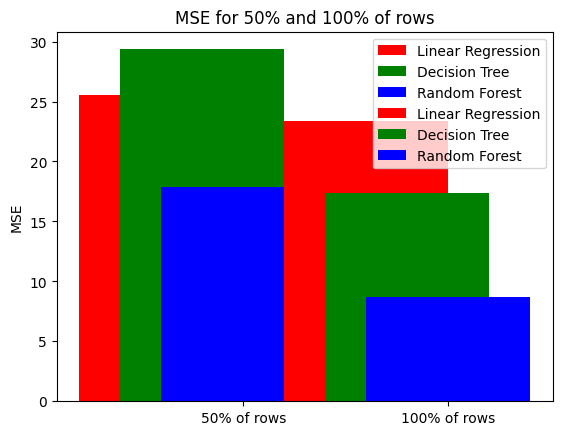

In [132]:
import matplotlib.pyplot as plt

# create list of MSE for each model
mse_linear = [mse_linear_50_rows, mse_linear_100_rows]
mse_tree = [mse_tree_50_rows, mse_tree_100_rows]
mse_forest = [mse_forest_50_rows, mse_forest_100_rows]

# create list of labels for each model
labels = ['Linear Regression', 'Decision Tree', 'Random Forest']

# create list of MSE for 50% and 100% of rows
mse_50_rows = [mse_linear_50_rows, mse_tree_50_rows, mse_forest_50_rows]
mse_100_rows = [mse_linear_100_rows, mse_tree_100_rows, mse_forest_100_rows]

# create list of MSE for each model
mse = [mse_50_rows, mse_100_rows]

# create list of colors for each model
colors = ['red', 'green', 'blue']

# create list of x values
x = [0, 1]

# create plot
fig, ax = plt.subplots()
for i in range(len(mse)): # for each row
    for j in range(len(mse[i])): # for each model
        ax.bar(x[i], mse[i][j], color=colors[j], label=labels[j])
        x[i] += 0.2
    x[i] += 0.2

# set labels
ax.set_ylabel('MSE')
ax.set_title('MSE for 50% and 100% of rows')
ax.set_xticks([0.4, 1.4])
ax.set_xticklabels(['50% of rows', '100% of rows'])
ax.legend()

plt.show()

> Вопрос:
- Способствует ли увеличение количества данных в датасете, улучшению точности модели и каким образом?

> Ответ:
- Да, увеличение количества данных в датасете способствует улучшению точности модели. Чем больше данных, тем точнее модель. Но есть исключения, например, если данных слишком много, то модель может переобучиться.

## Now do the same steps but change rows to columns count

In [133]:
#create dataset with only 50% of columns
data_50_columns = data.sample(frac=0.5, axis=1, random_state=1)

#split data into train and test
X = data.drop('MEDV', axis=1)
y = data['MEDV']

X_train_50_columns, X_test_50_columns, y_train_50_columns, y_test_50_columns = train_test_split(
    X, y, test_size=0.2, random_state=1)

#create linear regression model
linear_model_50_columns = LinearRegression()
linear_model_50_columns.fit(X_train_50_columns, y_train_50_columns)

#create decision tree model
tree_model_50_columns = DecisionTreeRegressor()
tree_model_50_columns.fit(X_train_50_columns, y_train_50_columns)

#create random forest model
forest_model_50_columns = RandomForestRegressor()
forest_model_50_columns.fit(X_train_50_columns, y_train_50_columns)

#predict values
y_pred_linear_50_columns = linear_model_50_columns.predict(X_test_50_columns)
y_pred_tree_50_columns = tree_model_50_columns.predict(X_test_50_columns)
y_pred_forest_50_columns = forest_model_50_columns.predict(X_test_50_columns)

#calculate mean squared error
mse_linear_50_columns = mean_squared_error(y_test_50_columns, y_pred_linear_50_columns)
mse_tree_50_columns = mean_squared_error(y_test_50_columns, y_pred_tree_50_columns)
mse_forest_50_columns = mean_squared_error(y_test_50_columns, y_pred_forest_50_columns)

print('Linear Regression MSE: ', mse_linear_50_columns)
print('Decision Tree MSE: ', mse_tree_50_columns)
print('Random Forest MSE: ', mse_forest_50_columns)

Linear Regression MSE:  23.380836480270055
Decision Tree MSE:  17.49186274509804
Random Forest MSE:  8.57041504901962


In [134]:
#create dataset with only 100% of columns
data_100_columns = data.sample(frac=1, axis=1, random_state=1)

#split data into train and test
X = data.drop('MEDV', axis=1)
y = data['MEDV']

X_train_100_columns, X_test_100_columns, y_train_100_columns, y_test_100_columns = train_test_split(
    X, y, test_size=0.2, random_state=1)

#create linear regression model
linear_model_100_columns = LinearRegression()
linear_model_100_columns.fit(X_train_100_columns, y_train_100_columns)

#create decision tree model
tree_model_100_columns = DecisionTreeRegressor()
tree_model_100_columns.fit(X_train_100_columns, y_train_100_columns)

#create random forest model
forest_model_100_columns = RandomForestRegressor()
forest_model_100_columns.fit(X_train_100_columns, y_train_100_columns)

#predict values
y_pred_linear_100_columns = linear_model_100_columns.predict(X_test_100_columns)
y_pred_tree_100_columns = tree_model_100_columns.predict(X_test_100_columns)
y_pred_forest_100_columns = forest_model_100_columns.predict(X_test_100_columns)

#calculate mean squared error
mse_linear_100_columns = mean_squared_error(y_test_100_columns, y_pred_linear_100_columns)
mse_tree_100_columns = mean_squared_error(y_test_100_columns, y_pred_tree_100_columns)
mse_forest_100_columns = mean_squared_error(y_test_100_columns, y_pred_forest_100_columns)

print('Linear Regression MSE: ', mse_linear_100_columns)
print('Decision Tree MSE: ', mse_tree_100_columns)
print('Random Forest MSE: ', mse_forest_100_columns)

Linear Regression MSE:  23.380836480270055
Decision Tree MSE:  27.23460784313726
Random Forest MSE:  9.152350372549021


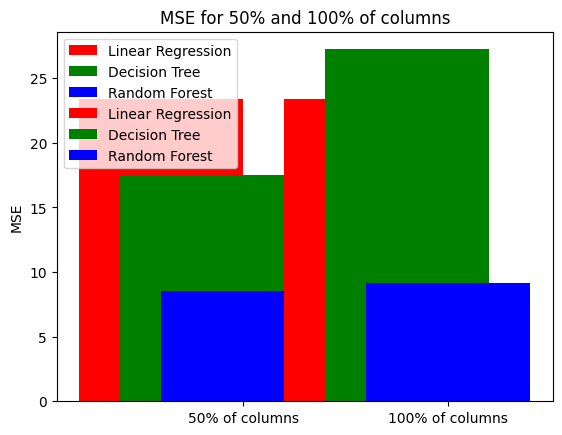

In [135]:
# create list of MSE for each model
mse_linear = [mse_linear_50_columns, mse_linear_100_columns]
mse_tree = [mse_tree_50_columns, mse_tree_100_columns]
mse_forest = [mse_forest_50_columns, mse_forest_100_columns]

# create list of labels for each model
labels = ['Linear Regression', 'Decision Tree', 'Random Forest']

# create list of MSE for 50% and 100% of columns
mse_50_columns = [mse_linear_50_columns, mse_tree_50_columns, mse_forest_50_columns]
mse_100_columns = [mse_linear_100_columns, mse_tree_100_columns, mse_forest_100_columns]

# create list of MSE for each model
mse = [mse_50_columns, mse_100_columns]

# create list of colors for each model
colors = ['red', 'green', 'blue']

# create list of x values
x = [0, 1]

# create plot
fig, ax = plt.subplots()
for i in range(len(mse)): # for each row
    for j in range(len(mse[i])): # for each model
        ax.bar(x[i], mse[i][j], color=colors[j], label=labels[j])
        x[i] += 0.2
    x[i] += 0.2

# set labels
ax.set_ylabel('MSE')
ax.set_title('MSE for 50% and 100% of columns')
ax.set_xticks([0.4, 1.4])
ax.set_xticklabels(['50% of columns', '100% of columns'])
ax.legend()

plt.show()